In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sal=pd.read_csv('Salary_dataset.csv')

In [3]:
sal.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
sal.drop('Unnamed: 0',axis=1, inplace=True)

In [5]:
sal.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [5]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
sal.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [7]:
sal.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
sal.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [9]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

<AxesSubplot:>

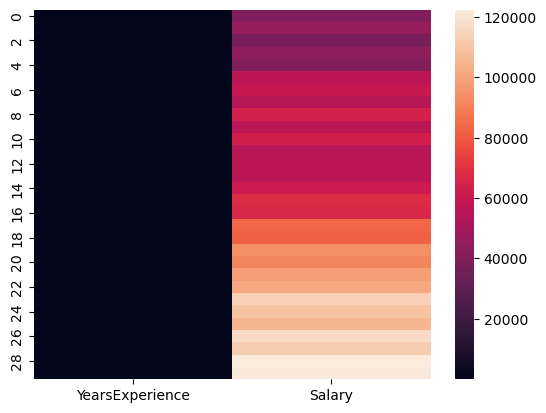

In [10]:
sns.heatmap(sal)

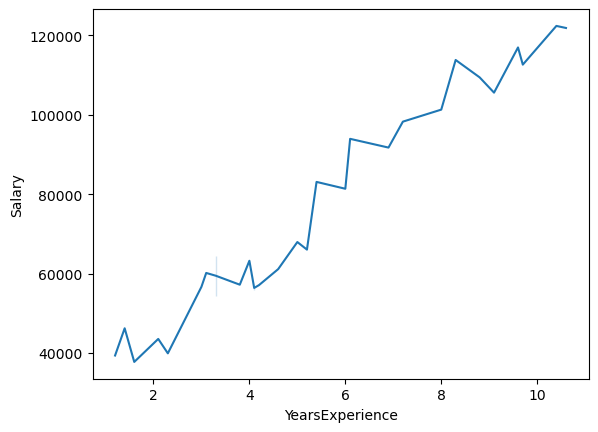

In [11]:
sns.lineplot( x = 'YearsExperience', y = 'Salary', data=sal)
plt.show()

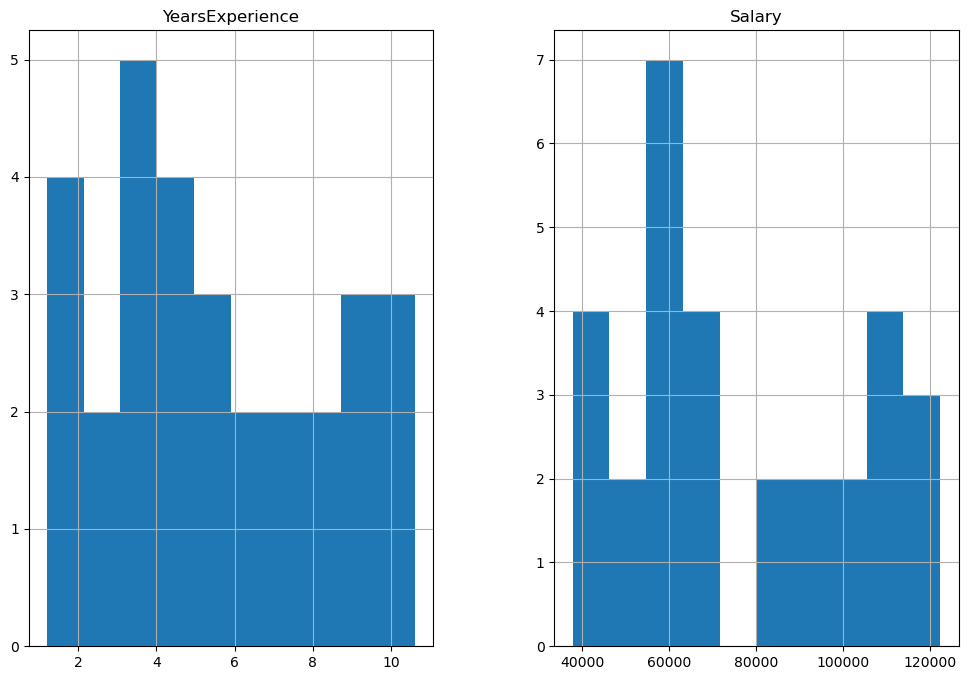

In [12]:
sal.hist(figsize=(12,8))
plt.show()

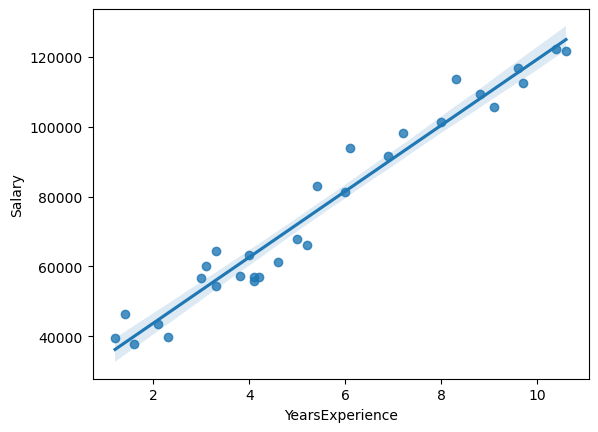

In [13]:
sns.regplot( x = 'YearsExperience', y = 'Salary', data=sal)
plt.show()

data processing

In [14]:
sal.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [15]:
X = sal["YearsExperience"]
y = sal["Salary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train[:5]

28    10.4
24     8.8
12     4.1
0      1.2
4      2.3
Name: YearsExperience, dtype: float64

In [17]:
y_train[:5]

28    122392.0
24    109432.0
12     56958.0
0      39344.0
4      39892.0
Name: Salary, dtype: float64

In [18]:
type(X_train),type(y_train)

(pandas.core.series.Series, pandas.core.series.Series)

In [19]:
X_train,X_test,y_train,y_test = X_train.to_numpy(),X_test.to_numpy(),y_train.to_numpy(),y_test.to_numpy()

In [20]:
X_train.reshape(-1,1)

array([[10.4],
       [ 8.8],
       [ 4.1],
       [ 1.2],
       [ 2.3],
       [ 5.2],
       [ 3. ],
       [ 4.2],
       [ 4.1],
       [ 8. ],
       [ 1.4],
       [ 1.6],
       [ 9.1],
       [ 2.1],
       [ 7.2],
       [ 9.6],
       [ 6. ],
       [10.6],
       [ 6.9],
       [ 3.3],
       [ 4. ],
       [ 4.6],
       [ 6.1],
       [ 3.1]])

In [21]:
type(X_train),type(y_train)

(numpy.ndarray, numpy.ndarray)

linear regression

In [22]:
reg = LinearRegression().fit(X_train.reshape(-1,1),y_train)
y_pred = reg.predict(X_test.reshape(-1,1))

In [23]:
r2_score(y_test,y_pred)

0.9024461774180498

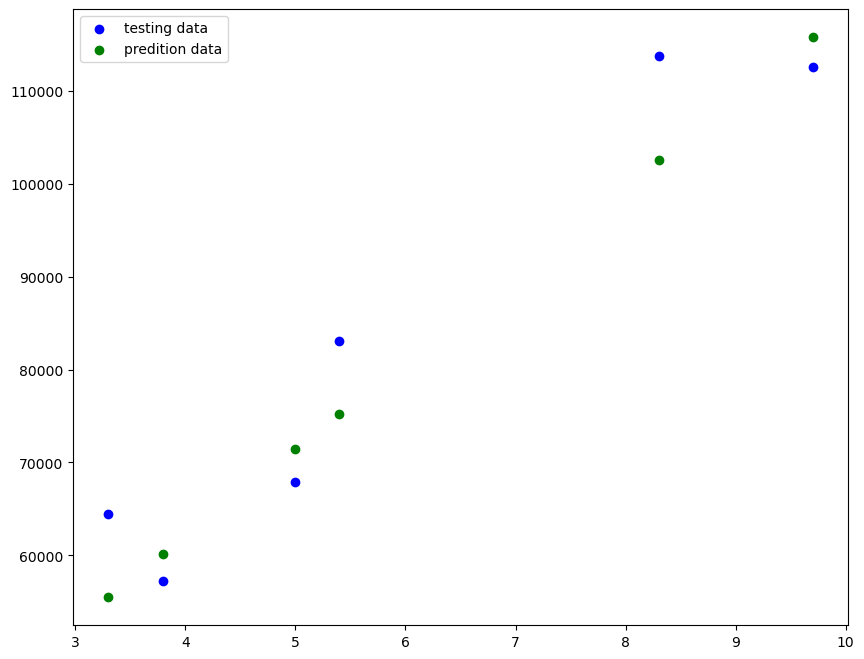

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(X_test,y_test,c='b',label="testing data")
plt.scatter(X_test,y_pred,c='g',label="predition data")
plt.legend()

<AxesSubplot:>

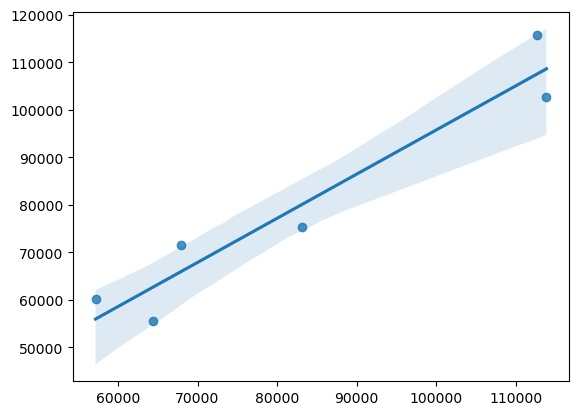

In [28]:
sns.regplot( x = y_test, y = y_pred)